# Pymaceuticals Inc.
---

### Analysis

- Based on the calculation of mean, median, variance, standard deviation, and SEM of the tumor volume, and plotting the bar chart, we can compare how effectiveness each drug type affect the tumor growth. 
 - With the line plot of tumor volume vs. time point for a single mouse (ID 1509) treated with Capomulin, we can tell it shows a decreasing trend. This suggests that Capomulin is effective for that mouse.
 - We also performed plotting a pie chart on the mouse genders to see it equally distributed. It proves there's equality in the study when compare the two genders, and reduces bias in the result.
 - When we calculated the correlation coefficient between mouse weihgt and average tumor volume (0.84), this shows a correlation coefficient (r) close to 1 indicates a strong positive relationship. Since the correlation is positive, it suggests that heavier mice tend to have larger tumors. This could imply that factors associated with greater weight (such as age, genetics, or health status) may also be contributing to tumor growth.
 - While calculating IQR and determining potential outliers, we detected unusual observations (extremely high or low tumor volumes). Outliers could either indicate extreme cases of drug inefficiency or effectiveness, or they might suggest data entry errors. For Capomulin treatment, the IQR shows that central tendency is fairly consistent and less variability compared to the Ceftamin treatment with 
IQ equal: 15.57.8

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
mouse_study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
mice_count = mouse_study_complete["Mouse ID"].nunique()
mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mouse_study_complete[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_id = duplicate_mouse["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_study_complete[mouse_study_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_complete[~mouse_study_complete['Mouse ID'].isin(duplicate_mouse_id)]
cleaned_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = cleaned_mouse_data["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_tumor_vol = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varian_tumor_vol = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol = cleaned_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({ 
                    "Mean Tumor Volume" : mean_tumor_vol,
                    "Median Tumor Volume" : median_tumor_vol,
                    "Tumor Volume Variance" : varian_tumor_vol,
                    "Tumor Volume Std. Dev." : std_tumor_vol,
                    "Tumor Volume Std. Err." : sem_tumor_vol

})

# Display the tumor summary table 
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_tumor_summary = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std='std',
    sem='sem'
)
aggregation_tumor_summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

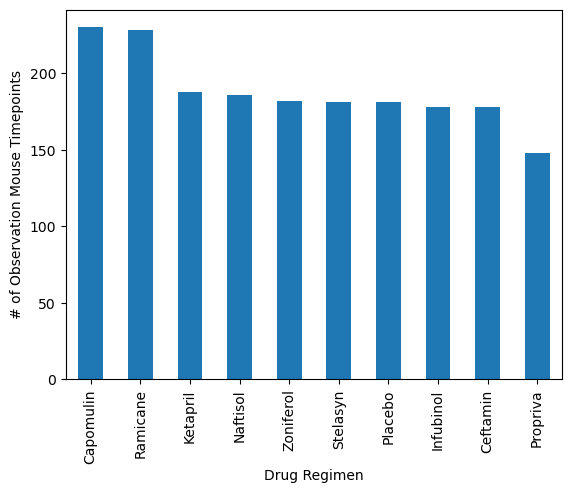

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# count the unique values in a Series. It returns a Series with the unique values as the index and their respective counts as the values.
# In this case it's drug regimen column in the dataframe
rows_num = cleaned_mouse_data["Drug Regimen"].value_counts()
rows_num.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observation Mouse Timepoints")
plt.show()

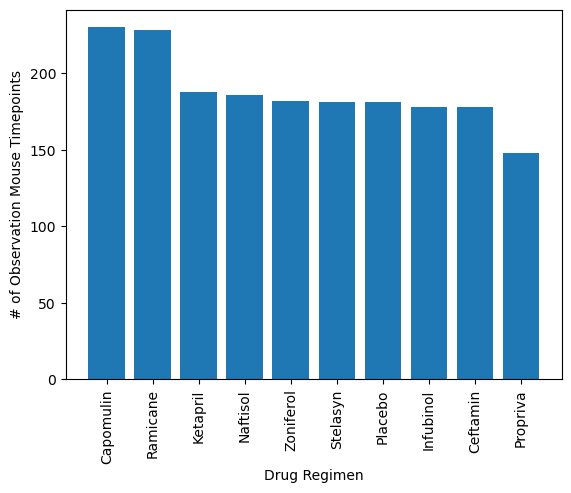

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows_num.index, rows_num.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observation Mouse Timepoints")
plt.show()

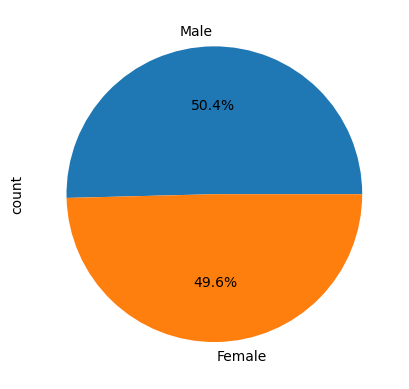

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Make the pie chart

uniq_mouse_gender = cleaned_mouse_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
uniq_mouse_gender.plot.pie(autopct='%1.1f%%', startangle=0)
plt.gca().set_aspect('equal')
plt.show()

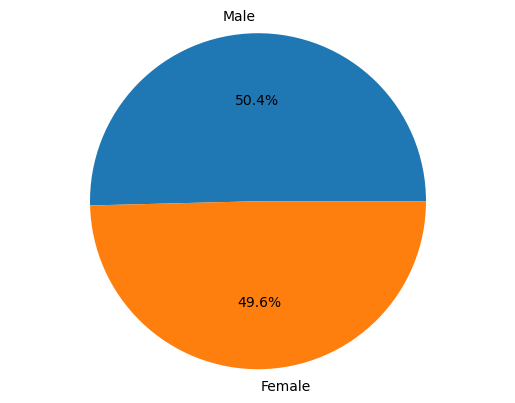

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# Make the pie chart

labels = uniq_mouse_gender.index    
sizes = uniq_mouse_gender.values     

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

spec_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(last_timepoints, cleaned_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')
filtered_tumor_vol = last_tumor_vol[last_tumor_vol['Drug Regimen'].isin(spec_drug_regimens)]
filtered_tumor_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Extract the tumor vol for each treatment
    tumor_volumes = filtered_tumor_vol.loc[filtered_tumor_vol['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']


    # add subset
    tumor_vol_data.append(tumor_volumes)

    # Determine outliers using upper and lower bounds
    # Quartiles are computed using the .quantile() function
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    # Calculate IQR by subtraction from upperq to lowerq
    iqr = upperq - lowerq

    # Calculate Outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Display the IQR and potential outliers.
    print(f"Treatment: {treatment} ")
    print(f"IQR: {iqr:.3f}")
    print(f"Potential outliers: {outliers}\n")

Treatment: Capomulin 
IQR: 7.782
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Ramicane 
IQR: 9.099
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment: Infubinol 
IQR: 11.477
Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment: Ceftamin 
IQR: 15.578
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



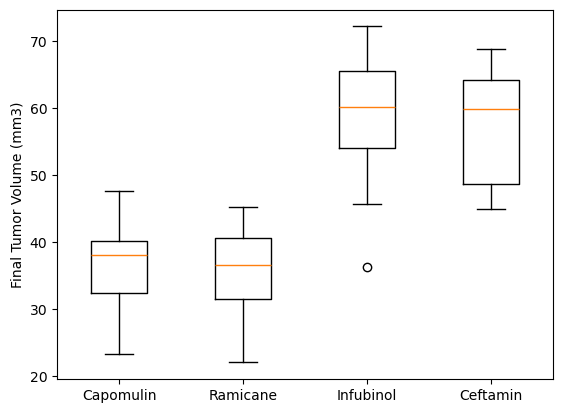

In [30]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

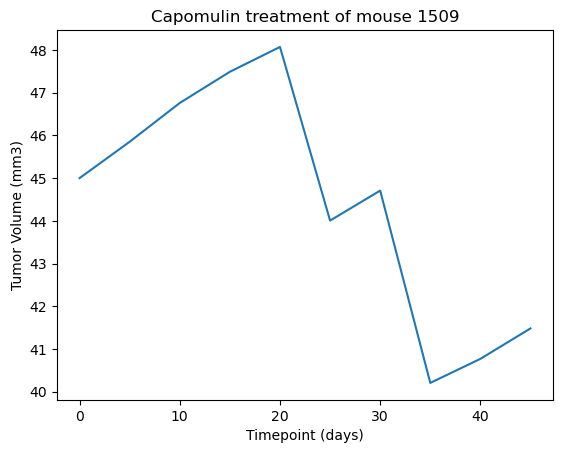

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find the single mouse treated with Capomulin, by using loc with the cleaned mouse dataframe
# In this case we chose Mouse ID: 1509 so it's easy to compare our result to the given result
singe_mouse_Capomulin = cleaned_mouse_data.loc[(
    cleaned_mouse_data['Drug Regimen'] == 'Capomulin') & (cleaned_mouse_data['Mouse ID'] == 'l509')]

# Plot
plt.plot(singe_mouse_Capomulin['Timepoint'], singe_mouse_Capomulin['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse 1509')
plt.show()

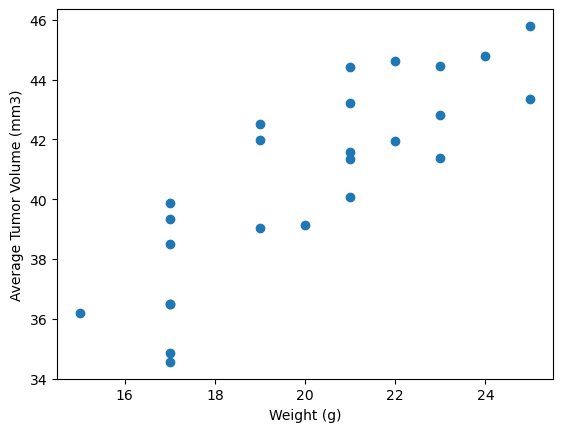

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Find Capomulin regimen data, average tumor volume, mouse weight
capomulin_data = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']
avg_mouse_weight = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Weight (g)']
# Had to use (numeric_only=True) otherwise it wouldn't work

# Scatter plot
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


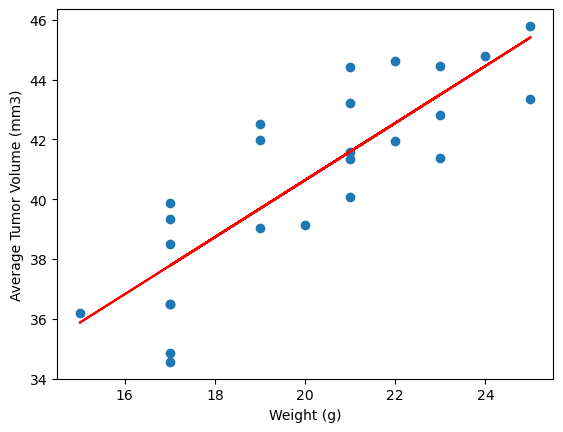

In [51]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr = np.corrcoef(mouse_weight, average_tumor_vol)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is: {corr:.2f}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_mouse_weight, avg_tumor_vol)
regress = slope * avg_mouse_weight + intercept

plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.plot(avg_mouse_weight, regress, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()